# ECSE 415 Final Project
# 4 Deep Learning Bonus Using a CNN classifier

In [1]:
# Import necessary packages
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import sys
import itertools
import time
from os import listdir

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import plot_model, to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the data

In [3]:
# Function to load the images given the folder name
def load_folder(folder):
    imgs = []
    files = listdir('./MIO-TCD-Classification/train/{}/'.format(folder))
    img_counter = 0
    print(folder)
    for img in files:
        # Read the images in grayscale
        img = cv2.cvtColor(cv2.imread('./MIO-TCD-Classification/train/{}/{}'.format(folder,img)), cv2.COLOR_BGR2GRAY)
        # Perform a box blur on the images
        kernel = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]])
        img = cv2.filter2D(img, -1, kernel)
        # Resize to reduce computation time
        img = cv2.resize(img, (32,32))
        imgs.append(img)
        img_counter += 1
        if(img_counter==num_samples): break
    return imgs

In [4]:
# The number of images from each class to import
num_samples = 1000000
# Import images from each folder
articulated_truck = load_folder('articulated_truck')
background = load_folder('background')
bicycle = load_folder('bicycle')
bus = load_folder('bus')
car = load_folder('car')
motorcycle = load_folder('motorcycle')
non_motorized_vehicle = load_folder('non-motorized_vehicle')
pedestrian = load_folder('pedestrian')
pickup_truck = load_folder('pickup_truck')
single_unit_truck = load_folder('single_unit_truck')
work_van = load_folder('work_van')

articulated_truck
background
bicycle
bus
car
motorcycle
non-motorized_vehicle
pedestrian
pickup_truck
single_unit_truck
work_van


# Split data and change y to categorical

In [7]:
# Create the data and labels variables
X = articulated_truck + background + bicycle + bus + car + motorcycle + non_motorized_vehicle + pedestrian + pickup_truck + single_unit_truck + work_van
y = ['articulated_truck']*len(articulated_truck) + ['background']*len(background) + ['bicycle']*len(bicycle) + \
    ['bus']*len(bus) + ['car']*len(car) + ['motorcycle']*len(motorcycle) + ['non_motorized_vehicle']*len(non_motorized_vehicle)\
    + ['pedestrian']*len(pedestrian) + ['pickup_truck']*len(pickup_truck) + ['single_unit_truck']*len(single_unit_truck) + \
    ['work_van']*len(work_van)

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [8]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

X_train = np.array(X_train).reshape(-1,32,32,1)
X_test = np.array(X_test).reshape(-1,32,32,1)

enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_train = to_categorical(y_train)
y_test = enc.transform(y_test)
y_test = to_categorical(y_test)

for i in range(11):
    print('Encoding:',i, '- Label:', enc.inverse_transform(i))

Encoding: 0 - Label: articulated_truck
Encoding: 1 - Label: background
Encoding: 2 - Label: bicycle
Encoding: 3 - Label: bus
Encoding: 4 - Label: car
Encoding: 5 - Label: motorcycle
Encoding: 6 - Label: non_motorized_vehicle
Encoding: 7 - Label: pedestrian
Encoding: 8 - Label: pickup_truck
Encoding: 9 - Label: single_unit_truck
Encoding: 10 - Label: work_van


C:\Users\Pasha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Pasha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Pasha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Pasha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

# Define Model

In [9]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(11, activation='softmax'))

    opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    return model
model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

In [11]:
plot_model(model, to_file='cnn_layers.png', show_shapes=True)

In [12]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=30, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, batch_size=1000)

Train on 441289 samples, validate on 77875 samples
Epoch 1/30
441289/441289 [==============================] - 20s 44us/step - loss: 0.9867 - acc: 0.7023 - val_loss: 0.8247 - val_acc: 0.7727
Epoch 2/30
441289/441289 [==============================] - 17s 38us/step - loss: 0.7358 - acc: 0.7742 - val_loss: 0.6504 - val_acc: 0.7931
Epoch 3/30
441289/441289 [==============================] - 17s 38us/step - loss: 0.6565 - acc: 0.7943 - val_loss: 0.5631 - val_acc: 0.8110
Epoch 4/30
441289/441289 [==============================] - 17s 38us/step - loss: 0.6050 - acc: 0.8102 - val_loss: 0.4986 - val_acc: 0.8470
Epoch 5/30
441289/441289 [==============================] - 17s 38us/step - loss: 0.5647 - acc: 0.8223 - val_loss: 0.4553 - val_acc: 0.8538
Epoch 6/30
441289/441289 [==============================] - 17s 38us/step - loss: 0.5329 - acc: 0.8320 - val_loss: 0.4323 - val_acc: 0.8650
Epoch 7/30
441289/441289 [==============================] - 17s 38us/step - loss: 0.5095 - acc: 0.8390 - val_

Loss, Accuracy: [0.2567689436970706, 0.9168025696258484]


Text(0.5,1,'Accuracy Curves')

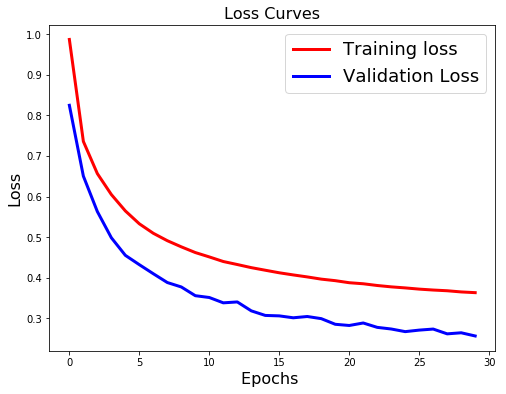

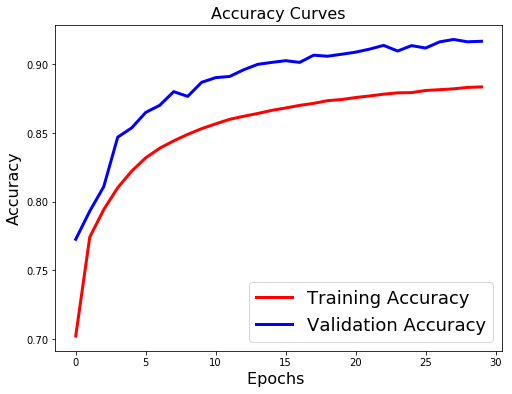

In [15]:
print('Loss, Accuracy: ' + str(score))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Create Confusion Matrix

In [17]:
y_pred = model.predict(X_test)

In [25]:
# Adapted from sklearn Confusion Matrix tutorial
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (12,12))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


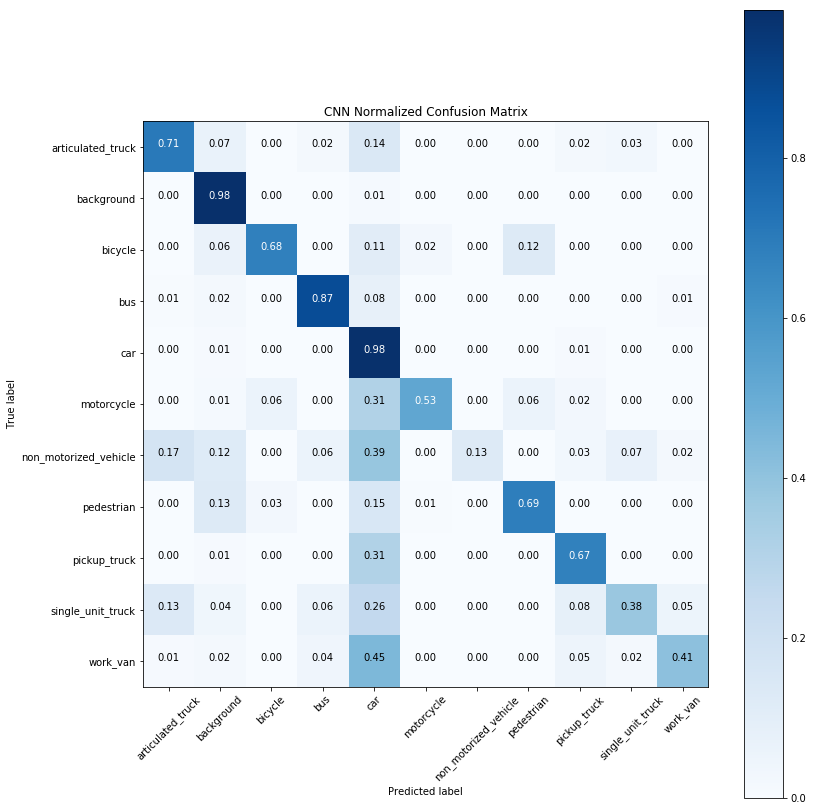

In [36]:
# Create the labels for the matrix
label = ['articulated_truck'] + ['background'] + ['bicycle'] + \
    ['bus'] + ['car'] + ['motorcycle'] + ['non_motorized_vehicle']\
    + ['pedestrian'] + ['pickup_truck'] + ['single_unit_truck'] + \
    ['work_van']

# Compute confusion matrix for LinearSVC()
cnn_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plot_confusion_matrix(cnn_matrix, classes=label, normalize=True,
                      title='CNN Normalized Confusion Matrix')

plt.show()